In [1]:
# import libraries
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'D:/ProgramFiles/TesseractOCR/tesseract.exe'

In [3]:
img = cv.imread("nid_sample.jpg") # nid image downloaded from google

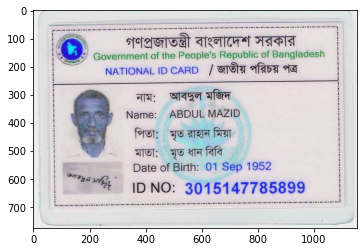

In [4]:
def show_image(img):
    imgplot = plt.imshow(img)
    plt.show()

show_image(img) # opencv read the image in BGR mode

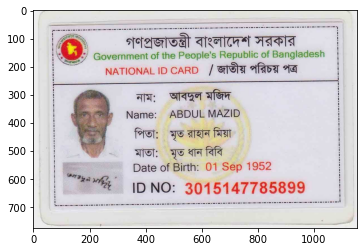

In [5]:
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
show_image(img)

In [6]:
# change brightness and contrast
def apply_brightness_contrast(input_img, brightness, contrast):
    if brightness != 0:
        if brightness > 0:
            shadow = brightness
            highlight = 255
        else:
            shadow = 0
            highlight = 255 + brightness
        alpha_b = (highlight - shadow)/255
        gamma_b = shadow

        buf = cv.addWeighted(input_img, alpha_b, input_img, 0, gamma_b)
    else:
        buf = input_img.copy()

    if contrast != 0:
        f = float(131 * (contrast + 127)) / (127 * (131 - contrast))
        alpha_c = f
        gamma_c = 127*(1-f)

        buf = cv.addWeighted(buf, alpha_c, buf, 0, gamma_c)
    return buf

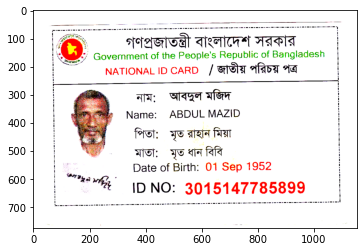

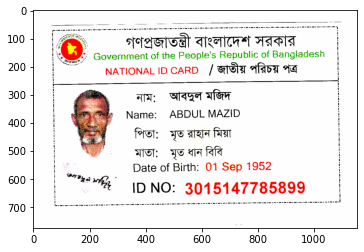

In [7]:
img = apply_brightness_contrast(img, 0, 100) # increase contrast
show_image(img)
img = cv.fastNlMeansDenoisingColored(img,None,10,10,7,21) # denoising image
show_image(img)

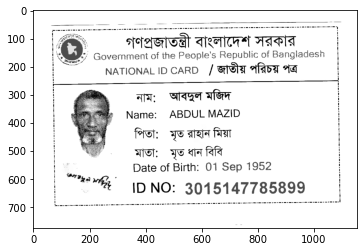

In [8]:
img = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
imgplot = plt.imshow(img, cmap="gray")
plt.show() #grayscal image

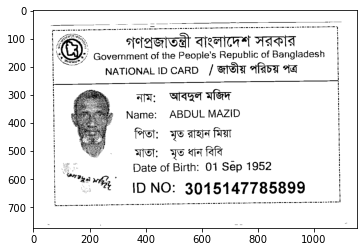

In [9]:
img = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,11,2)
imgplot = plt.imshow(img, cmap="gray")
plt.show() #adaptive thresholded image

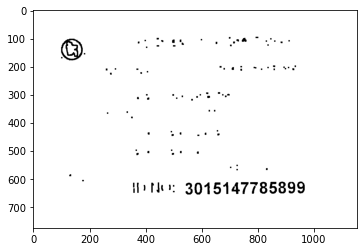

In [10]:
kernel = np.ones((5,5),np.uint8)
closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)
imgplot = plt.imshow(closing, cmap="gray")
plt.show()

In [11]:
img = cv.cvtColor(closing, cv.COLOR_GRAY2RGB)
output = pytesseract.image_to_string(img)

In [12]:
def get_nid_card_number(data):
    data = data.split()
    for element in data:
        if element.isnumeric():
            return element

In [13]:
result = get_nid_card_number(output)
print(result)

3015147785899
